In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [2]:
%matplotlib inline

In [3]:
!pip install pycaret


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [4]:
#Here we will imoport our data
from pycaret.datasets import get_data
all_datasets = get_data('index')

Dataset    Data Types  \
0                            anomaly  Multivariate   
1                             france  Multivariate   
2                            germany  Multivariate   
3                               bank  Multivariate   
4                              blood  Multivariate   
5                             cancer  Multivariate   
6                             credit  Multivariate   
7                           diabetes  Multivariate   
8                    electrical_grid  Multivariate   
9                           employee  Multivariate   
10                             heart  Multivariate   
11                     heart_disease  Multivariate   
12                         hepatitis  Multivariate   
13                            income  Multivariate   
14                             juice  Multivariate   
15                               nba  Multivariate   
16                              wine  Multivariate   
17                         telescope  Multivariate   
18                           titanic  Multivariate   
19  us_presidential_election_results  Multivariate   
20                             glass  Multivariate   
21                              iris  Multivariate   
22                             poker  Multivariate   
23                         questions  Multivariate   
24                         satellite  Multivariate   
25                               CTG  Multivariate   
26                          asia_gdp  Multivariate   
27                         elections  Multivariate   
28                          facebook  Multivariate   
29                               ipl  Multivariate   
30                         jewellery  Multivariate   
31                              mice  Multivariate   
32                         migration  Multivariate   
33                           perfume  Multivariate   
34                           pokemon  Multivariate   
35                        population  Multivariate   
36                     public_health  Multivariate   
37                             seeds  Multivariate   
38                         wholesale  Multivariate   
39                            tweets          Text   
40                            amazon          Text   
41                              kiva          Text   
42                               spx          Text   
43                         wikipedia          Text   
44                        automobile  Multivariate   
45                              bike  Multivariate   
46                            boston  Multivariate   
47                          concrete  Multivariate   
48                           diamond  Multivariate   
49                            energy  Multivariate   
50                            forest  Multivariate   
51                              gold  Multivariate   
52                             house  Multivariate   
53                         insurance  Multivariate   
54                        parkinsons  Multivariate   
55                           traffic  Multivariate   

                   Default Task Target Variable 1 Target Variable 2  \
0             Anomaly Detection              None              None   
1       Association Rule Mining         InvoiceNo       Description   
2       Association Rule Mining         InvoiceNo       Description   
3       Classification (Binary)           deposit              None   
4       Classification (Binary)             Class              None   
5       Classification (Binary)             Class              None   
6       Classification (Binary)           default              None   
7       Classification (Binary)    Class variable              None   
8       Classification (Binary)             stabf              None   
9       Classification (Binary)              left              None   
10      Classification (Binary)             DEATH              None   
11      Classification (Binary)           Disease              None   
12      Classification (Bin

In [5]:
df = get_data('anomaly')
df.head()

Col1      Col2      Col3      Col4      Col5      Col6      Col7  \
0  0.263995  0.764929  0.138424  0.935242  0.605867  0.518790  0.912225   
1  0.546092  0.653975  0.065575  0.227772  0.845269  0.837066  0.272379   
2  0.336714  0.538842  0.192801  0.553563  0.074515  0.332993  0.365792   
3  0.092108  0.995017  0.014465  0.176371  0.241530  0.514724  0.562208   
4  0.325261  0.805968  0.957033  0.331665  0.307923  0.355315  0.501899   

       Col8      Col9     Col10  
0  0.608234  0.723782  0.733591  
1  0.331679  0.429297  0.367422  
2  0.861309  0.899017  0.088600  
3  0.158963  0.073715  0.208463  
4  0.558449  0.885169  0.182754

Col1      Col2      Col3      Col4      Col5      Col6      Col7  \
0  0.263995  0.764929  0.138424  0.935242  0.605867  0.518790  0.912225   
1  0.546092  0.653975  0.065575  0.227772  0.845269  0.837066  0.272379   
2  0.336714  0.538842  0.192801  0.553563  0.074515  0.332993  0.365792   
3  0.092108  0.995017  0.014465  0.176371  0.241530  0.514724  0.562208   
4  0.325261  0.805968  0.957033  0.331665  0.307923  0.355315  0.501899   

       Col8      Col9     Col10  
0  0.608234  0.723782  0.733591  
1  0.331679  0.429297  0.367422  
2  0.861309  0.899017  0.088600  
3  0.158963  0.073715  0.208463  
4  0.558449  0.885169  0.182754

In [6]:
df.describe()

Col1         Col2         Col3         Col4         Col5  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.491362     0.490200     0.509077     0.497362     0.586120   
std       0.259138     0.251931     0.256606     0.263562     0.334658   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.287458     0.291449     0.337802     0.256147     0.169680   
50%       0.492070     0.488656     0.510077     0.497537     0.782019   
75%       0.694192     0.686531     0.686914     0.731949     0.847956   
max       0.994431     1.000000     1.000000     1.000000     1.000000   

              Col6         Col7         Col8         Col9        Col10  
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  
mean      0.514636     0.508270     0.457541     0.477685     0.495760  
std       0.317470     0.278483     0.220129     0.241432     0.211677  
min       0.000000     0.000000     0.000000     0.000000     0.014495  
25%       0.142587     0.246021     0.245539     0.291452     0.329904  
50%       0.537953     0.465679     0.515619     0.387753     0.488891  
75%       0.856512     0.804935     0.626757     0.723674     0.659528  
max       1.000000     1.000000     1.000000     0.988732     1.000000

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Col1    1000 non-null   float64
 1   Col2    1000 non-null   float64
 2   Col3    1000 non-null   float64
 3   Col4    1000 non-null   float64
 4   Col5    1000 non-null   float64
 5   Col6    1000 non-null   float64
 6   Col7    1000 non-null   float64
 7   Col8    1000 non-null   float64
 8   Col9    1000 non-null   float64
 9   Col10   1000 non-null   float64
dtypes: float64(10)
memory usage: 78.2 KB


### Exploratory Anomalies Detection Analysis

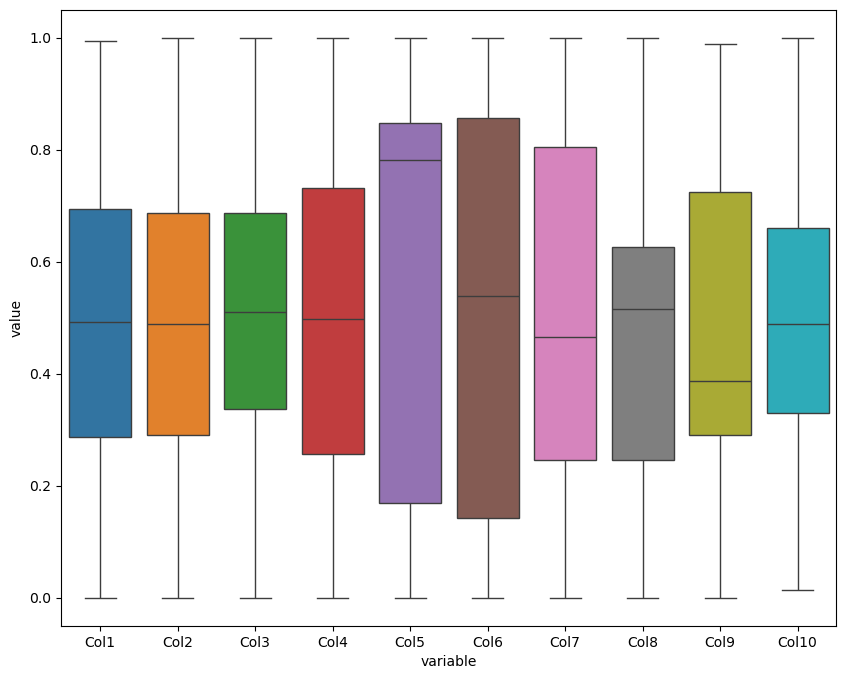

In [13]:
sns.boxplot(x="variable", y="value", hue="variable", data=pd.melt(df))

plt.show()

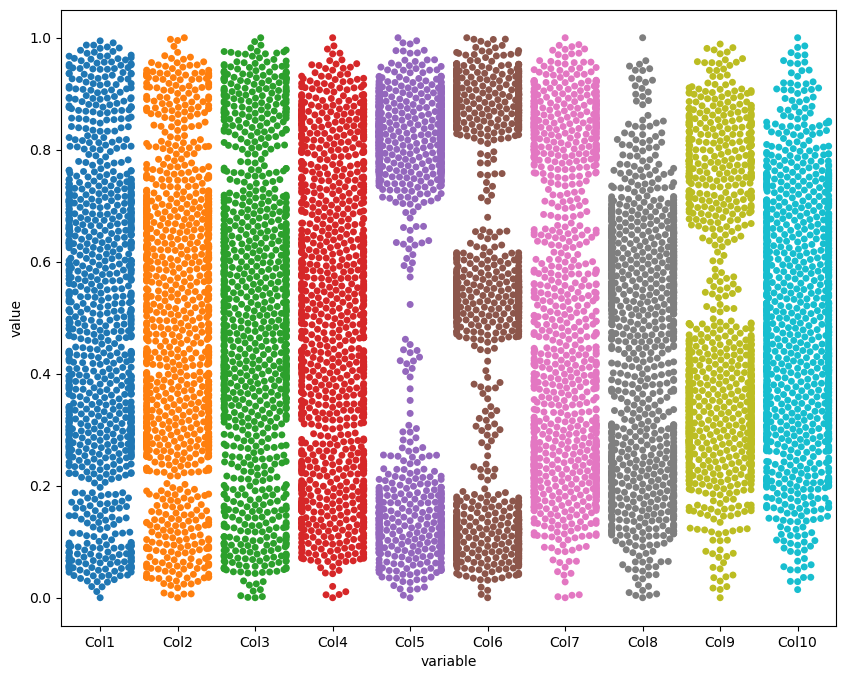

In [10]:
# a swarmplot is useful to use alongside a box plot beacues you can better understand the shape of the data
plt.rcParams["figure.figsize"] = (10,8)
sns.swarmplot(x="variable", y="value", hue="variable", data=pd.melt(df))

plt.show()

<AxesSubplot: xlabel='Col1', ylabel='Col2'>

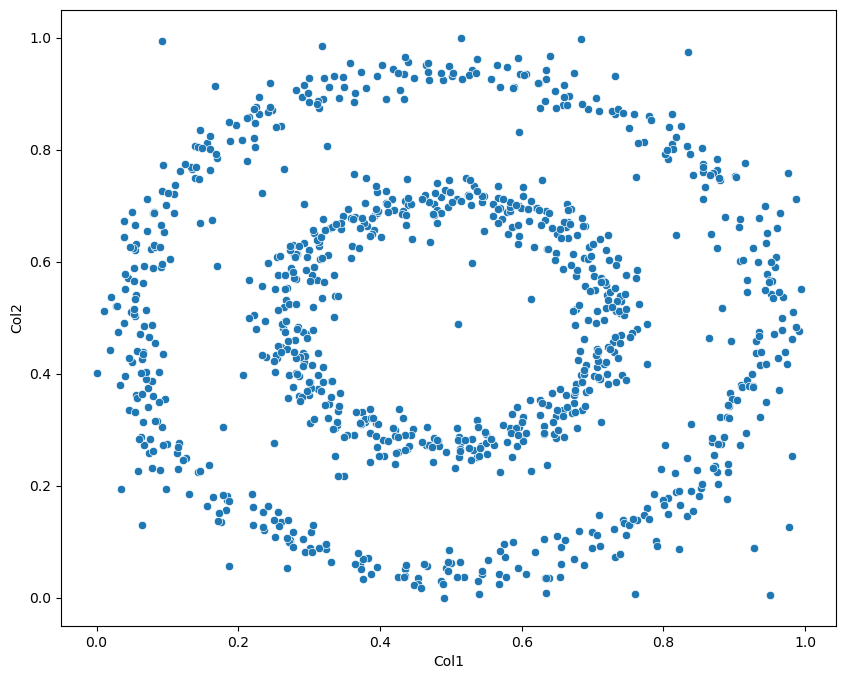

In [11]:
sns.scatterplot(data=df, x="Col1", y='Col2')

<AxesSubplot: xlabel='Col3', ylabel='Col4'>

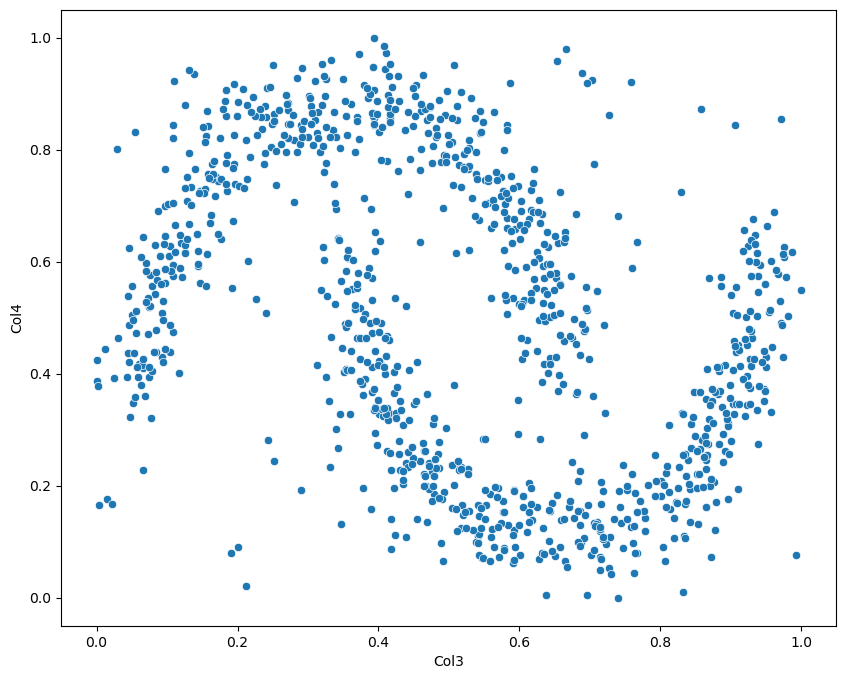

In [12]:
sns.scatterplot(data=df, x="Col3", y='Col4')

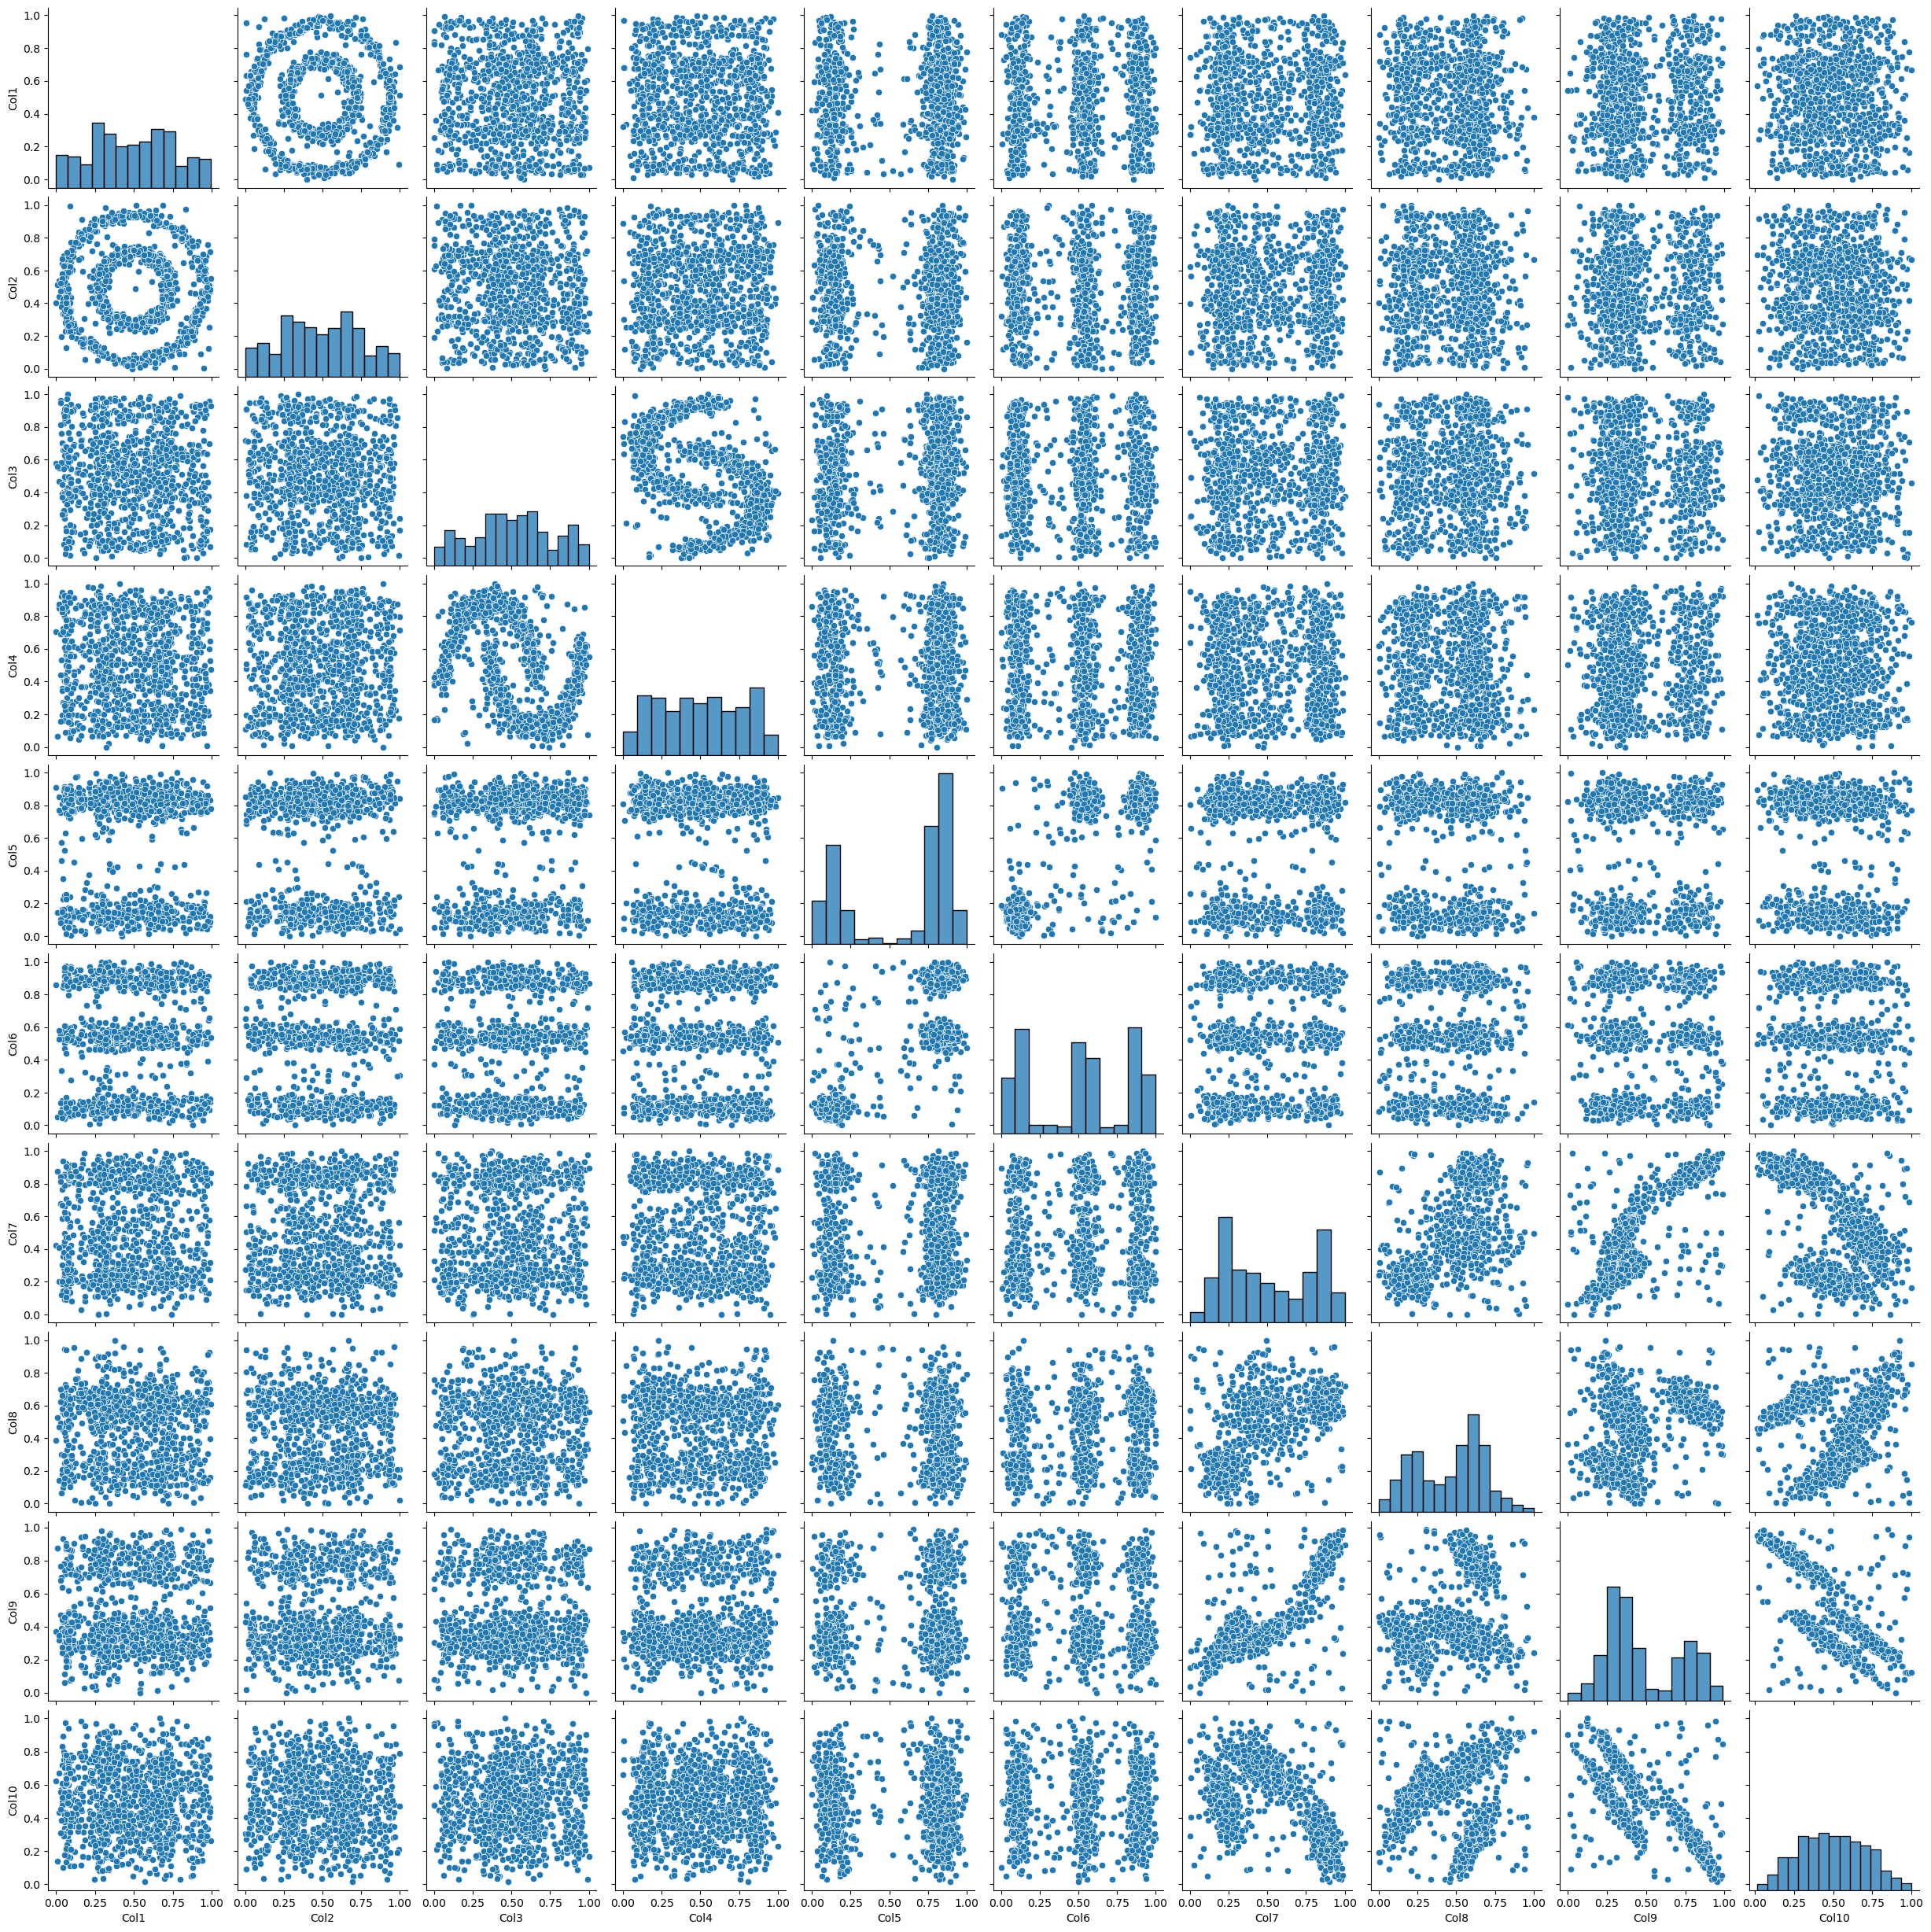

In [14]:
# this function will create a grid of Axes s.t. each numeric variable in data will be shared 
# across the y-axes across a single row and the x-axes across a single column. 
# The diagonal plots are treated differently:
# a univariate distibution plot is drawn to show the marginal distribution of the data in each column
sns.pairplot(df)

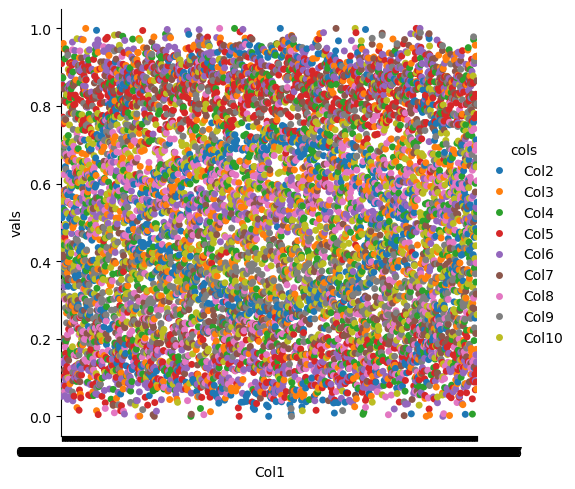

In [15]:
#sns.factorplot deprecated. Replaced with catplot
df1 = df.melt('Col1', var_name='cols',  value_name='vals')
g = sns.catplot(x="Col1", y="vals", hue='cols', data=df1)

### Setup PyCaret Environment for anomaly detection

In [16]:
from pycaret.anomaly import *

exp_01 = setup(df, session_id = 123)

In [17]:
#Provides list of all models that can be used for anomaly detection
models()

Name  \
ID                                             
abod            Angle-base Outlier Detection   
cluster       Clustering-Based Local Outlier   
cof         Connectivity-Based Local Outlier   
iforest                     Isolation Forest   
histogram  Histogram-based Outlier Detection   
knn             K-Nearest Neighbors Detector   
lof                     Local Outlier Factor   
svm                   One-class SVM detector   
pca             Principal Component Analysis   
mcd           Minimum Covariance Determinant   
sod               Subspace Outlier Detection   
sos             Stochastic Outlier Selection   

                                                  Reference  
ID                                                           
abod                                  pyod.models.abod.ABOD  
cluster    pycaret.internal.patches.pyod.CBLOFForceToDouble  
cof                                     pyod.models.cof.COF  
iforest                         pyod.models.iforest.IForest  
histogram                             pyod.models.hbos.HBOS  
knn                                     pyod.models.knn.KNN  
lof                                     pyod.models.lof.LOF  
svm                                 pyod.models.ocsvm.OCSVM  
pca                                     pyod.models.pca.PCA  
mcd                                     pyod.models.mcd.MCD  
sod                                     pyod.models.sod.SOD  
sos                                     pyod.models.sos.SOS

### Select and Create Models

In [40]:
# IForest is an unsupervised machine learning model that's particularly effective at detecting anomalies.
# The algorithm segregates observations by randomly selecting a feature
# and then randomly selecting a split value between the max and min values of selected feature.
# The anomaly score is calculated as the numbers of splits/conditions required to separate 
# a given observation from the rest of the data,
# and based on that it selects its parameters 

iforest = create_model('iforest')
print(iforest)

IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=123, verbose=0)


In [41]:
# Local Outlier Factor (LOF) is an unsupervised machine learning model used for anomaly or outlier detection.
# It measures the local density of a data point relative to its neighbors.
# Data points that have a significantly lower density than their neighbors are considered outliers.

lof = create_model('lof')
print(lof)

LOF(algorithm='auto', contamination=0.05, leaf_size=30, metric='minkowski',
  metric_params=None, n_jobs=-1, n_neighbors=20, novelty=True, p=2)


In [46]:
#K Nearest Neighbors
# It classifies a data point based on the majority class of its 'k' nearest neighbors in the feature space.
knn = create_model('knn')
print(knn)

KNN(algorithm='auto', contamination=0.05, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
  radius=1.0)


### Compare anomalies in models

Rows labeled with 1 in the 'Anomaly' column are detected anomalies

In [47]:
iforest_results = assign_model(iforest)
iforest_results.head()

Col1      Col2      Col3      Col4      Col5      Col6      Col7  \
0  0.263995  0.764929  0.138424  0.935242  0.605867  0.518790  0.912225   
1  0.546092  0.653975  0.065575  0.227772  0.845269  0.837066  0.272379   
2  0.336714  0.538842  0.192801  0.553563  0.074515  0.332993  0.365792   
3  0.092108  0.995017  0.014465  0.176371  0.241530  0.514724  0.562208   
4  0.325261  0.805968  0.957033  0.331665  0.307923  0.355315  0.501899   

       Col8      Col9     Col10  Anomaly  Anomaly_Score  
0  0.608234  0.723782  0.733591        0      -0.035865  
1  0.331679  0.429297  0.367422        0      -0.084927  
2  0.861309  0.899017  0.088600        1       0.025356  
3  0.158963  0.073715  0.208463        1       0.042415  
4  0.558449  0.885169  0.182754        0      -0.023408

In [48]:
lof_results = assign_model(lof)
lof_results.head()

Col1      Col2      Col3      Col4      Col5      Col6      Col7  \
0  0.263995  0.764929  0.138424  0.935242  0.605867  0.518790  0.912225   
1  0.546092  0.653975  0.065575  0.227772  0.845269  0.837066  0.272379   
2  0.336714  0.538842  0.192801  0.553563  0.074515  0.332993  0.365792   
3  0.092108  0.995017  0.014465  0.176371  0.241530  0.514724  0.562208   
4  0.325261  0.805968  0.957033  0.331665  0.307923  0.355315  0.501899   

       Col8      Col9     Col10  Anomaly  Anomaly_Score  
0  0.608234  0.723782  0.733591        0       1.262566  
1  0.331679  0.429297  0.367422        0       1.043429  
2  0.861309  0.899017  0.088600        0       1.331218  
3  0.158963  0.073715  0.208463        1       1.591832  
4  0.558449  0.885169  0.182754        0       1.223608

In [49]:
knn_results = assign_model(knn)
knn_results.head()

Col1      Col2      Col3      Col4      Col5      Col6      Col7  \
0  0.263995  0.764929  0.138424  0.935242  0.605867  0.518790  0.912225   
1  0.546092  0.653975  0.065575  0.227772  0.845269  0.837066  0.272379   
2  0.336714  0.538842  0.192801  0.553563  0.074515  0.332993  0.365792   
3  0.092108  0.995017  0.014465  0.176371  0.241530  0.514724  0.562208   
4  0.325261  0.805968  0.957033  0.331665  0.307923  0.355315  0.501899   

       Col8      Col9     Col10  Anomaly  Anomaly_Score  
0  0.608234  0.723782  0.733591        0       0.569672  
1  0.331679  0.429297  0.367422        0       0.484217  
2  0.861309  0.899017  0.088600        1       0.691915  
3  0.158963  0.073715  0.208463        1       0.811600  
4  0.558449  0.885169  0.182754        0       0.634337

In [50]:
iforest_anomaly = iforest_results[iforest_results['Anomaly']==1]
iforest_shape = iforest_anomaly.shape

lof_anomaly = lof_results[lof_results['Anomaly']==1]
lof_shape = lof_anomaly.shape

knn_anomaly = knn_results[knn_results['Anomaly']==1]
knn_shape = knn_anomaly.shape

print('IForest anomaly shape: {}'.format(iforest_shape))
print('Local Outlier Factor anomaly shape: {}'.format(iforest_shape))
print('K Nearest Neighbors anomaly shape: {}'.format(knn_shape))

IForest anomaly shape: (50, 12)
Local Outlier Factor anomaly shape: (50, 12)
K Nearest Neighbors anomaly shape: (50, 12)


### Visualize, interpret decisions, and save the model

In [33]:
%matplotlib notebook

In [57]:
# 3D plot for outliers
plot_model(lof)

We can see that the 3D model clearly shows four clusters, and those data points that are further away from the clusters are classified as outliers.

In [35]:
plot_model(lof, plot = 'umap', save=True)

'UMAP Dimensionality Plot.png'

In [51]:
save_model(iforest,'IForest_Model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Col1', 'Col2', 'Col3', 'Col4',
                                              'Col5', 'Col6', 'Col7', 'Col8',
                                              'Col9', 'Col10'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('trained_model',
                  IForest(behaviour='new', bootstrap=False, contamination=0.05,
     max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
     random_state=123, verbose=0))]),
 'IForest_Model.pkl')

In [58]:
save_model(lof,'LOF_Model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Col1', 'Col2', 'Col3', 'Col4',
                                              'Col5', 'Col6', 'Col7', 'Col8',
                                              'Col9', 'Col10'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('trained_model',
                  LOF(algorithm='auto', contamination=0.05, leaf_size=30, metric='minkowski',
   metric_params=None, n_jobs=-1, n_neighbors=20, novelty=True, p=2))]),
 'LOF_Model.pkl')

In [52]:
from yellowbrick.text import UMAPVisualizer

In [53]:
dfr = iforest_results['Anomaly']

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


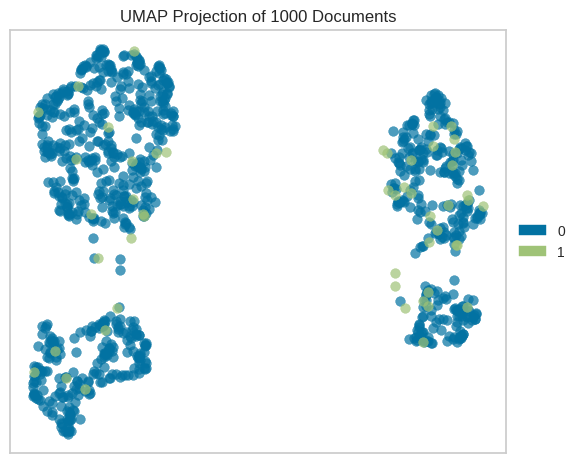

<AxesSubplot: title={'center': 'UMAP Projection of 1000 Documents'}>

In [54]:
umap = UMAPVisualizer()
umap.fit(df, dfr)
umap.show()

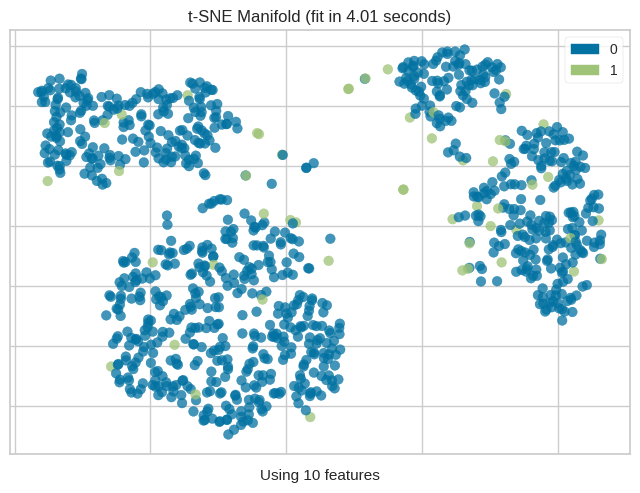

<AxesSubplot: title={'center': 't-SNE Manifold (fit in 4.01 seconds)'}, xlabel='Using 10 features'>

In [55]:
from yellowbrick.features import Manifold

viz = Manifold(manifold="tsne")

viz.fit_transform(df, dfr)
viz.show() 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


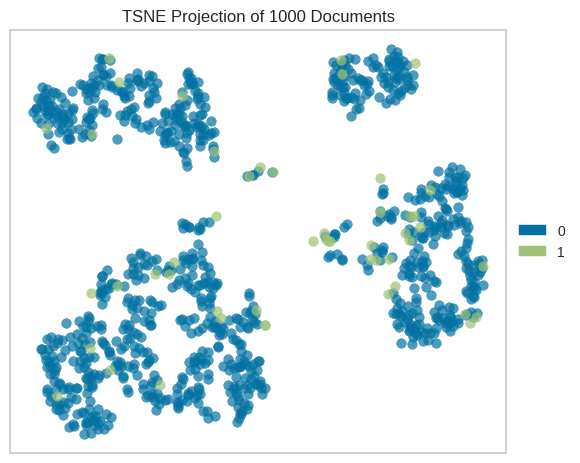

<AxesSubplot: title={'center': 'TSNE Projection of 1000 Documents'}>

In [56]:
from yellowbrick.text import TSNEVisualizer

tsne = TSNEVisualizer(decompose_by=4) #changing number changes style of TSNE
tsne.fit(df, dfr)
tsne.show()